In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
Base = automap_base()
# Reflect tables
Base.prepare(engine, reflect=True)

In [13]:
Base.classes.keys()

['measurement', 'station']

In [14]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create session to line Python to database
session = Session(engine)

In [16]:
# Find the most recent date in the dataset
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [20]:
# Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data
prev_year = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(prev_year)

2016-08-23


In [21]:
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year, Measurement.prcp != None).\
    order_by(Measurement.date).all()

In [23]:
# Load the query results into a Pandas DataFrame, and set the index to the "date" column
df = pd.DataFrame(prcp_data, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


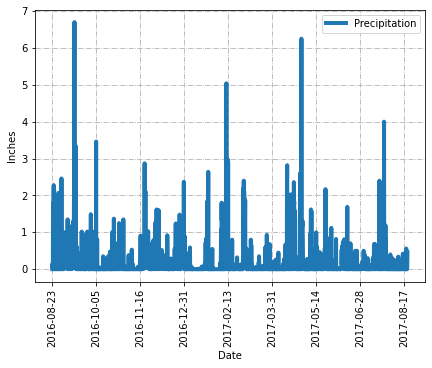

In [47]:
# Plot the results
df.plot(kind='line', figsize=(7,5), linewidth=4)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.grid(visible=True, linestyle='-.')
plt.savefig('./Precipitation.png', format='png')

In [50]:
# Use Pandas to print the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [52]:
# Design a query to find the most-active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active 
# station id found in the previous query
temp_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
temp_query

[(54.0, 85.0, 71.66378066378067)]

In [78]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data
temp_data = session.query(Measurement.tobs).\
      filter(Measurement.date >= prev_year, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()
print(temp_data)

[(59.0,), (59.0,), (59.0,), (60.0,), (60.0,), (61.0,), (62.0,), (62.0,), (62.0,), (62.0,), (62.0,), (62.0,), (63.0,), (63.0,), (63.0,), (63.0,), (64.0,), (64.0,), (64.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (66.0,), (66.0,), (66.0,), (66.0,), (66.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), 

In [79]:
# Transform into pandas dataframe
temp_df = pd.DataFrame(temp_data, columns=['tobs'])
temp_df.head()

,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


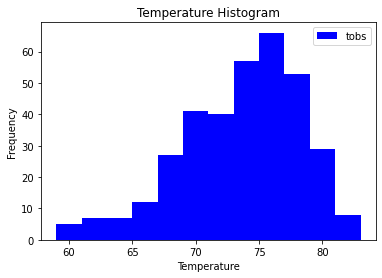

<Figure size 432x288 with 0 Axes>

In [85]:
# Plot as a histogram
temp_df.plot.hist(bins=12, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.show()
plt.savefig('./temp-histogram.png')

In [86]:
# Close session
session.close()